In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [24]:
df = pd.read_csv('karachi-weather-2021-2023.csv', parse_dates=['datetime'])
df.head()

,datetime,temp
0,2021-01-01,15.0
1,2021-01-02,15.4
2,2021-01-03,15.6
3,2021-01-04,16.3
4,2021-01-05,17.1


In [12]:
df.shape

(846, 2)

#### Q1

In [40]:
df2 = df.groupby('datetime')['temp'].sum().reset_index()

In [42]:
df3 = df2.set_index('datetime')

In [44]:
weekly_data = df3['temp'].resample('W').mean()

In [46]:
weekly_data.head()

datetime
2021-01-03    15.333333
2021-01-10    16.028571
2021-01-17    17.085714
2021-01-24    19.457143
2021-01-31    17.800000
Freq: W-SUN, Name: temp, dtype: float64

#### Q2

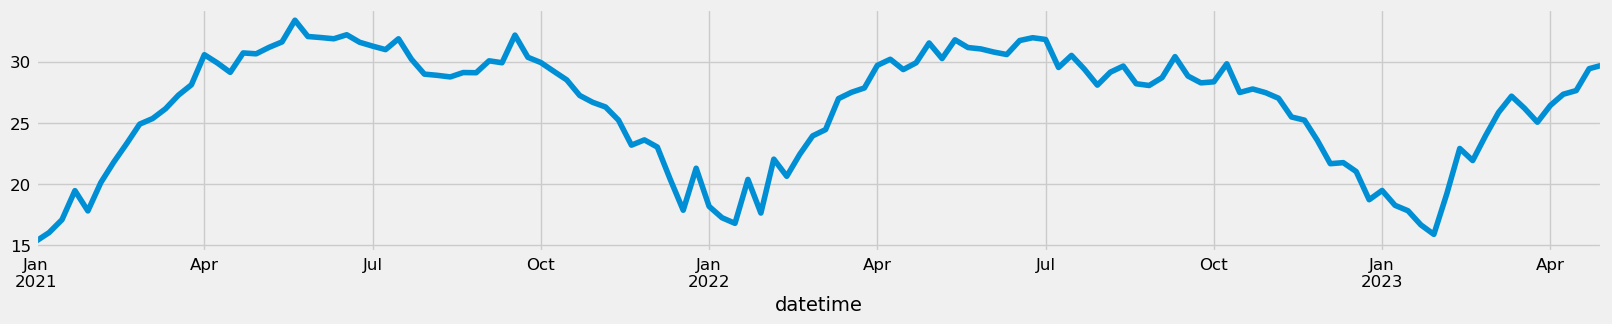

In [53]:
weekly_data.plot(figsize=(18, 3))
plt.show()

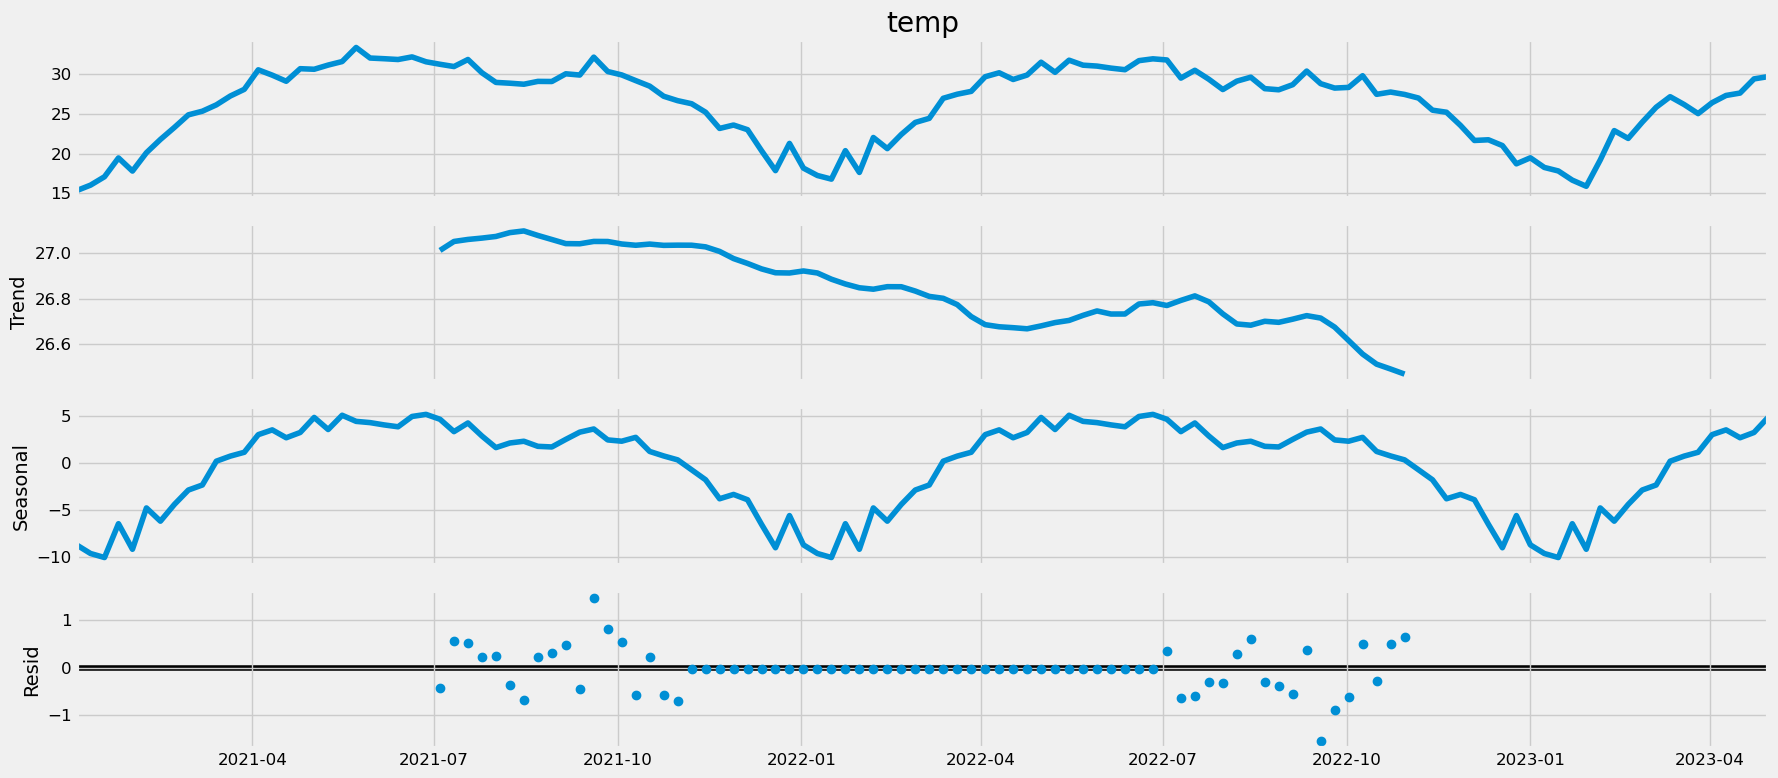

In [55]:
decomposition = sm.tsa.seasonal_decompose(weekly_data, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

##### Anaysis
##### Trend: The trend line shows a gradual increase in temperature over the observed period ande observable fluctuations with some increases and decreases, indicating a possible seasonal effect or other influencing factors.
##### Seasonal:The seasonal graph illustrates a pattern that appears to fluctuates around a central value ande seasonal variations seem to repeat approximately every year, indicating typical seasonal changes in temperaturs. 
##### Residual: The residuals show scattered points around the zero line with no apparent pattern. The absence of any patterns in the residuals suggests that the model is appropriately fitted to the date.

#### Q3

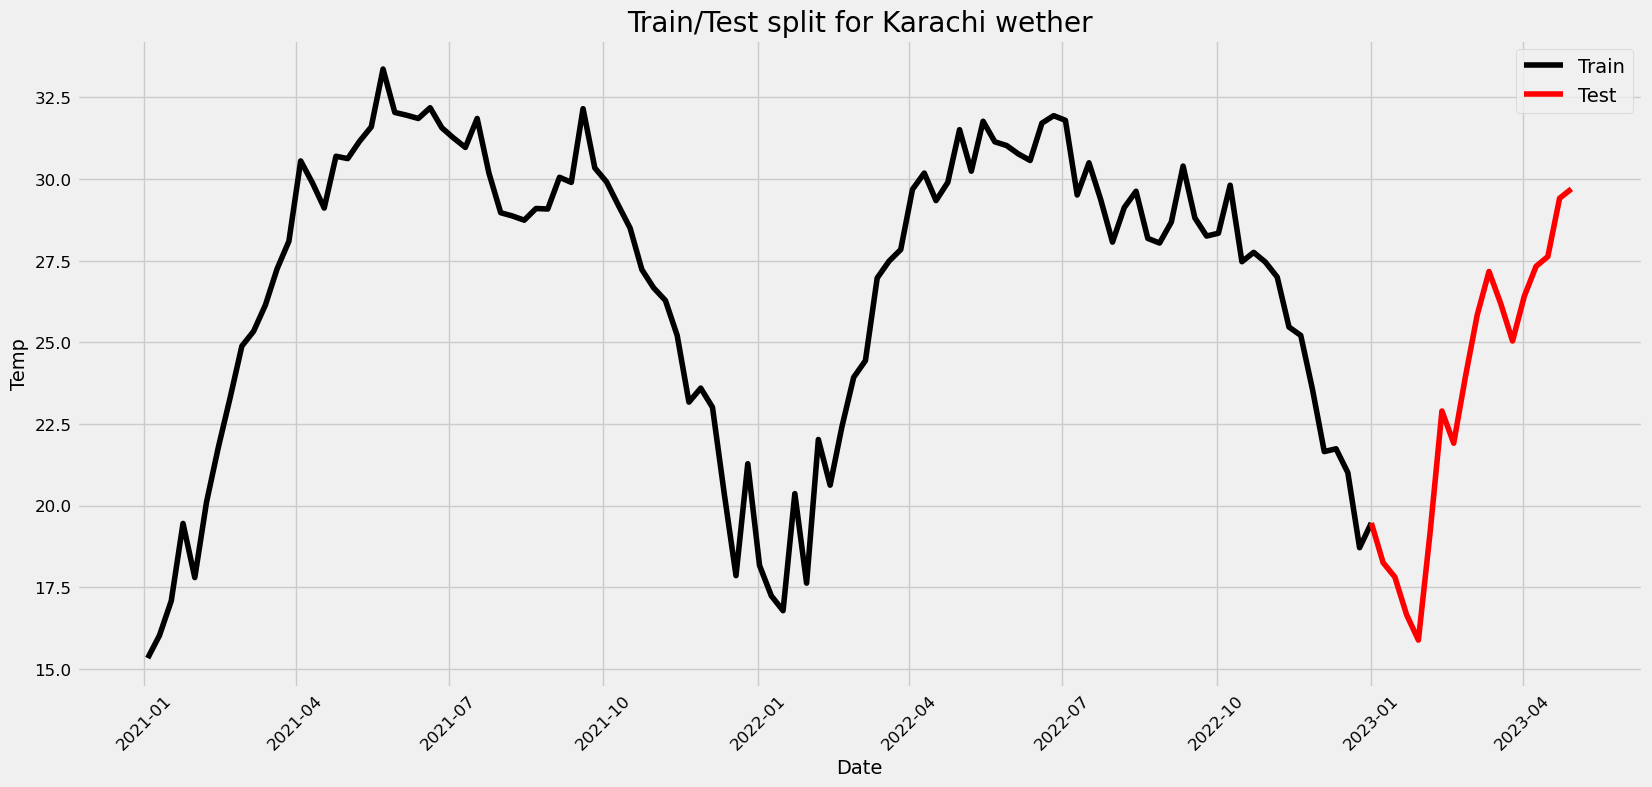

In [60]:
train = weekly_data[weekly_data.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test = weekly_data[weekly_data.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Karachi wether")
plt.legend()
plt.show()

#### Q4

##### ARIMA

In [24]:
from statsmodels.tsa.arima.model import ARIMA

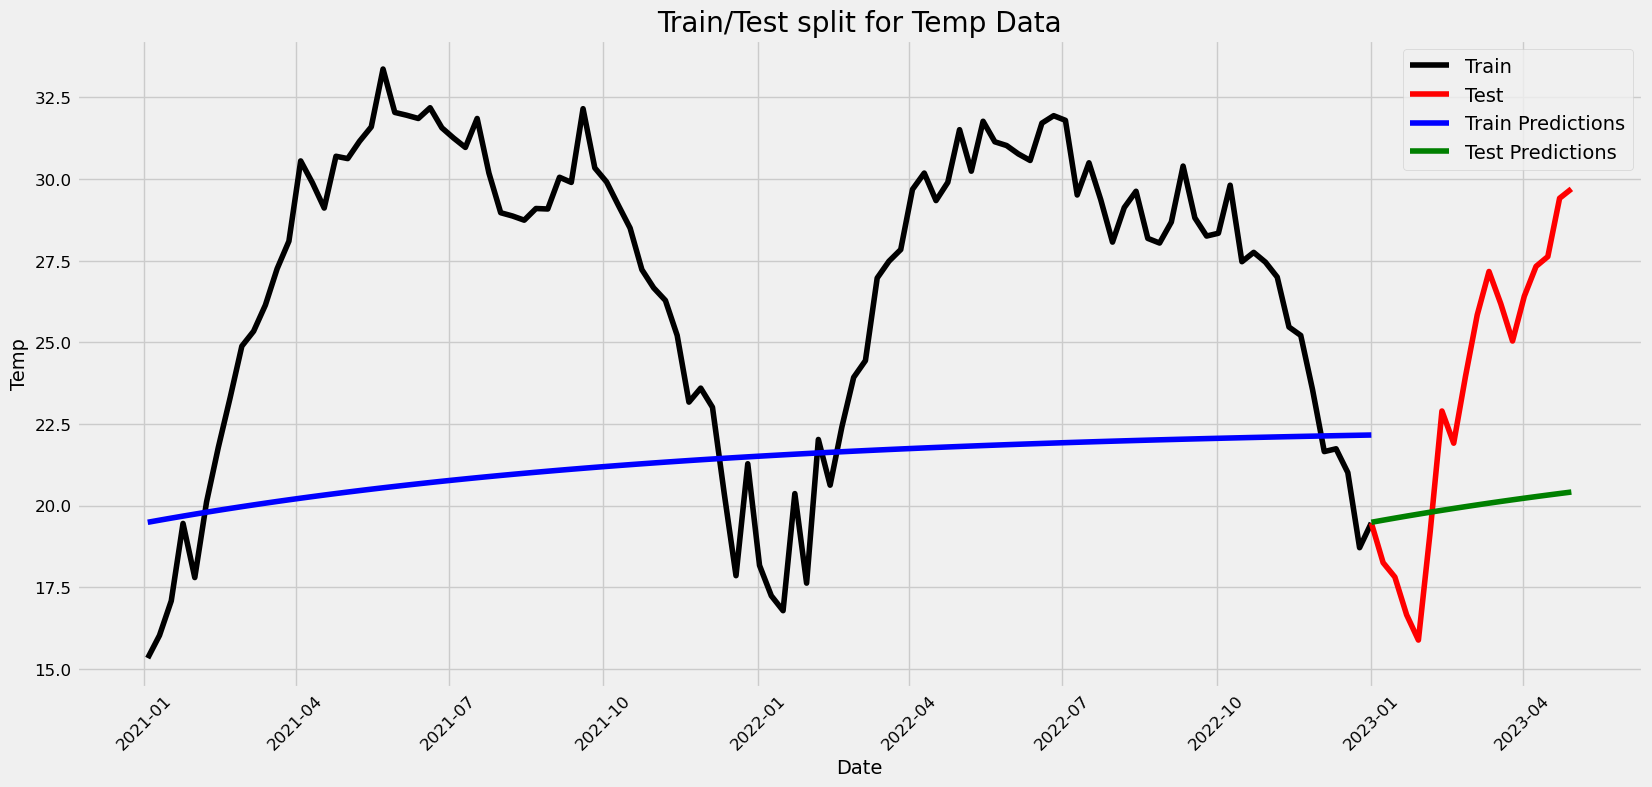

RMSE:  5.333699333578507


In [88]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05)
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temp Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [71]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -185.835
Date:                Fri, 08 Nov 2024   AIC                            379.669
Time:                        17:23:45   BIC                            390.285
Sample:                    01-03-2021   HQIC                           383.971
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4693      3.881      5.790      0.000      14.863      30.075
ar.L1          0.9783      0.024     39.979      0.000       0.930       1.026
ma.L1         -0.1032      0.089     -1.163      0.2

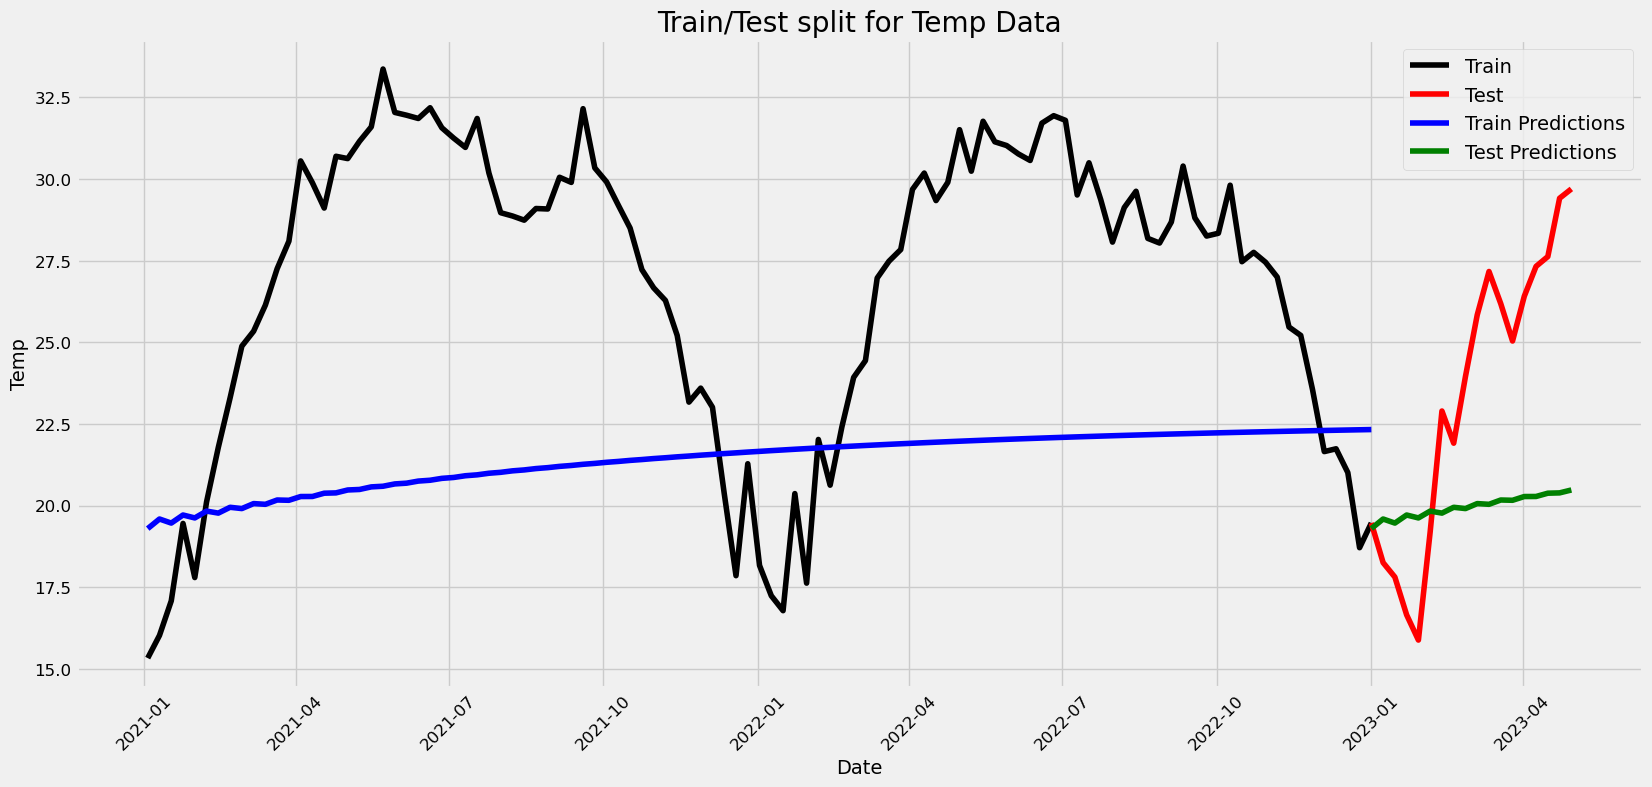

RMSE:  5.3152062420300865


In [86]:
ARIMAmodel = ARIMA(train, order = (2, 0, 2))
ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temp Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [75]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -183.831
Date:                Fri, 08 Nov 2024   AIC                            379.661
Time:                        17:26:56   BIC                            395.585
Sample:                    01-03-2021   HQIC                           386.114
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6128      3.758      6.017      0.000      15.247      29.979
ar.L1          0.0809      0.133      0.609      0.543      -0.180       0.341
ar.L2          0.8753      0.131      6.674      0.0

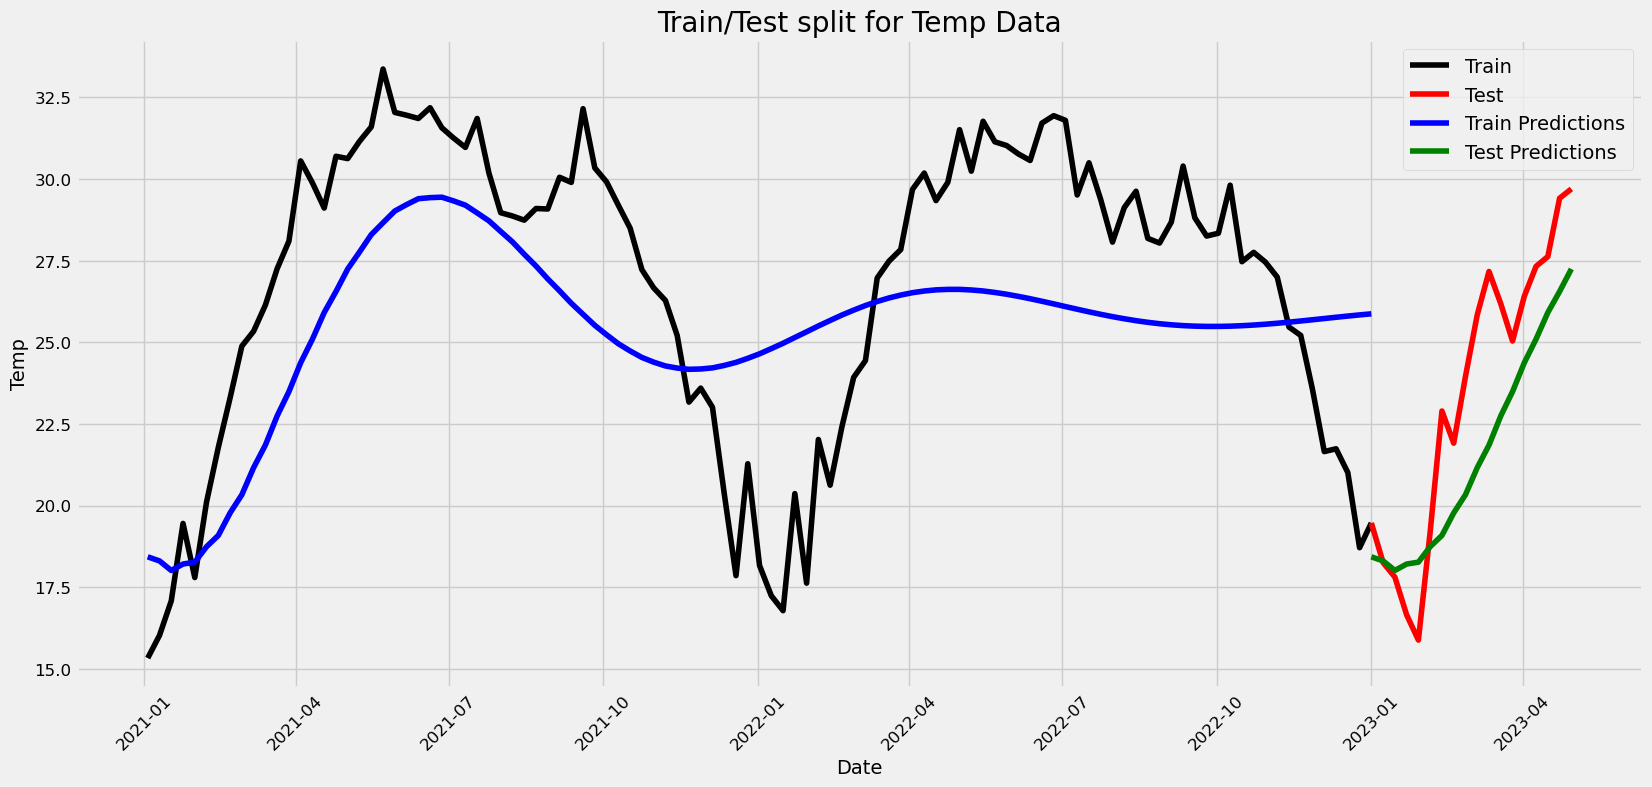

RMSE:  2.7098777701530183


In [84]:
ARIMAmodel = ARIMA(train, order = (3,0,3))
ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Train set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temp Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [80]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -168.122
Date:                Fri, 08 Nov 2024   AIC                            352.243
Time:                        17:29:12   BIC                            373.475
Sample:                    01-03-2021   HQIC                           360.847
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8496      1.541     16.778      0.000      22.830      28.869
ar.L1          0.9857      0.229      4.304      0.000       0.537       1.435
ar.L2          0.8386      0.406      2.065      0.0

##### Since, ARIMA(3, 0, 3) has the lowest RMSE, it's currently the best perforing model.

### Q5

#### SARIMA

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


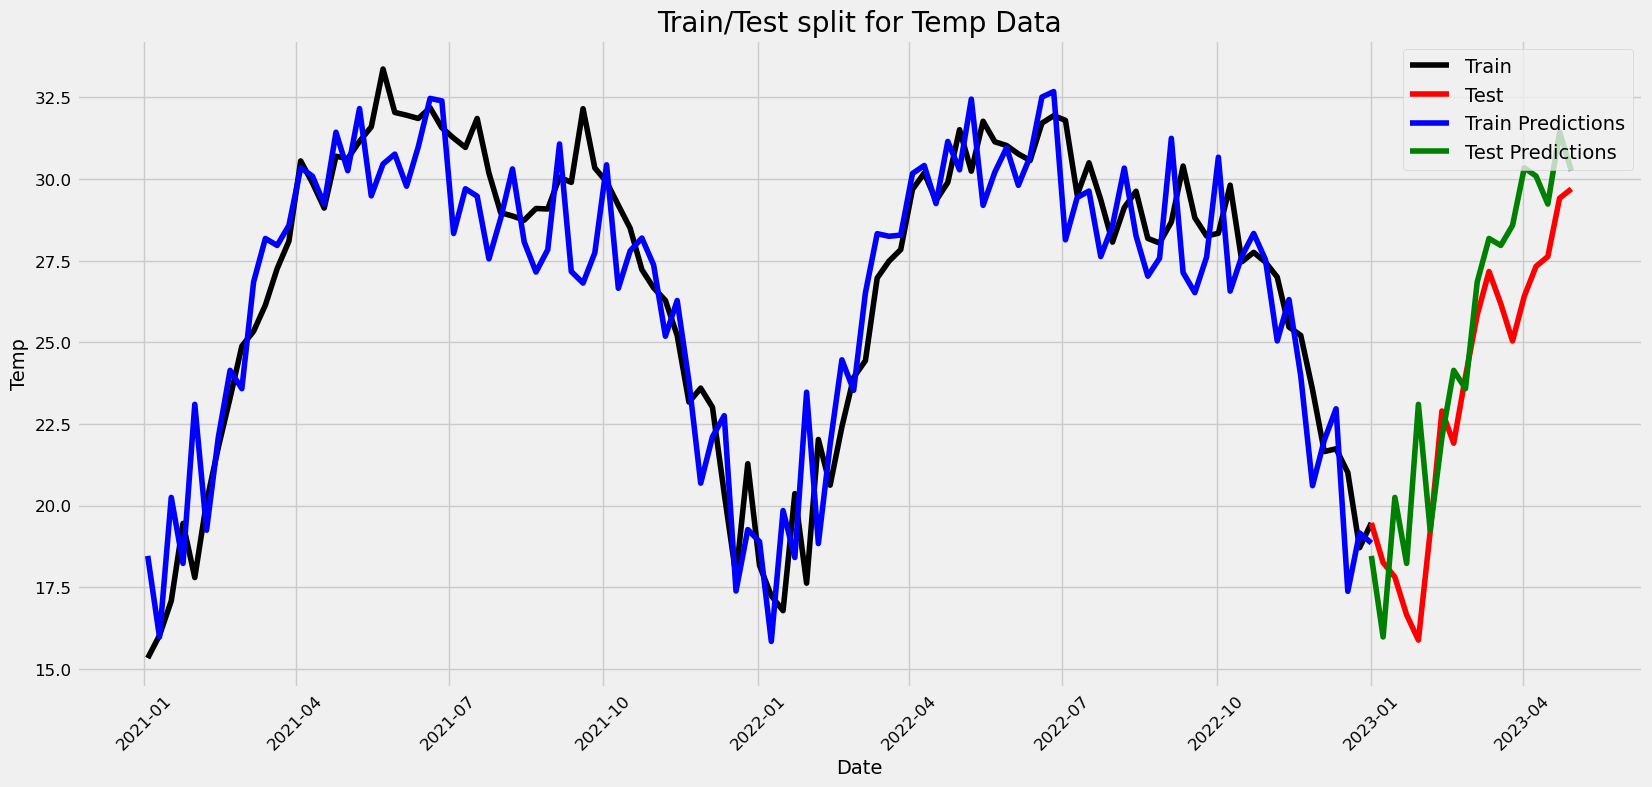

RMSE:  2.5855871063816234


In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train, order=(3, 0, 3),seasonal_order=(1, 1, 1, 52)) 
SARIMAXmodel = SARIMAXmodel.fit()

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temp Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [101]:
print(SARIMAXmodel.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 temp   No. Observations:                  105
Model:             SARIMAX(3, 0, 3)x(1, 1, [1], 52)   Log Likelihood                 -83.403
Date:                              Fri, 08 Nov 2024   AIC                            184.806
Time:                                      20:27:40   BIC                            202.538
Sample:                                  01-03-2021   HQIC                           191.625
                                       - 01-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3733      0.411      0.908      0.364      -0.433       1.179
ar.L2         -0.65

### Q6

In [112]:
p = d = q = range(0, 2)
P = Q = D = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(P, Q, D))]

In [114]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(1, 1, 1, 52)52 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 1, 1, 52)52 - AIC:8.0
SARIMAX(0, 1, 0)x(1, 1, 1, 52)52 - AIC:6.0
SARIMAX(0, 1, 1)x(1, 1, 1, 52)52 - AIC:8.0
SARIMAX(1, 0, 0)x(1, 1, 1, 52)52 - AIC:8.0
SARIMAX(1, 0, 1)x(1, 1, 1, 52)52 - AIC:10.0
SARIMAX(1, 1, 0)x(1, 1, 1, 52)52 - AIC:8.0
SARIMAX(1, 1, 1)x(1, 1, 1, 52)52 - AIC:10.0


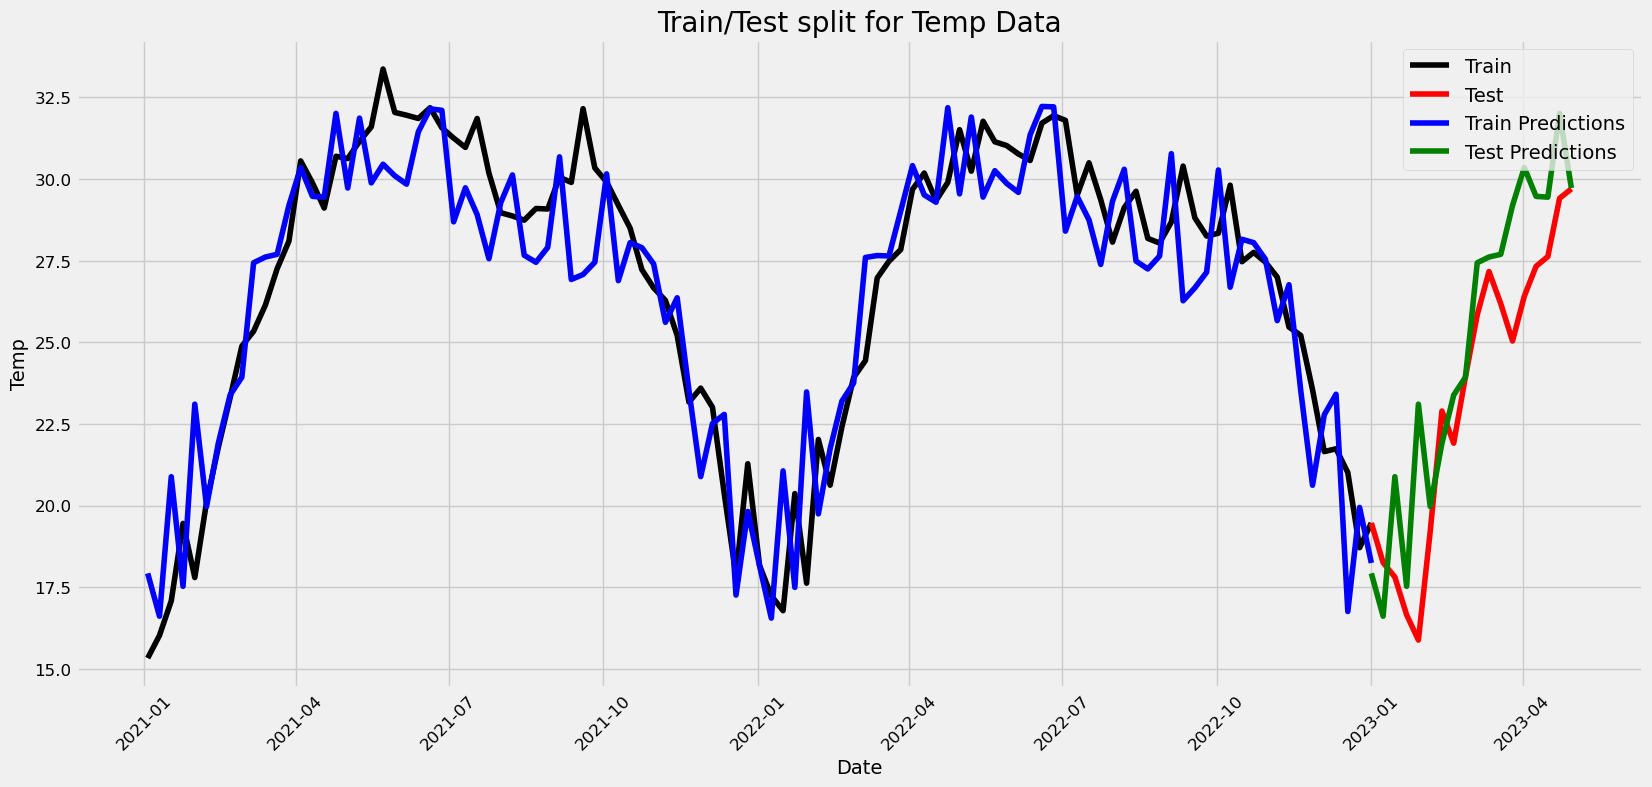

RMSE:  2.6210909383741163


In [176]:
# Use optimal parameters from above with lowest AIC

SARIMAXmodel = SARIMAX(train, order=(0,0,0),seasonal_order=(1, 1, 1, 52)) 
SARIMAXmodel = SARIMAXmodel.fit()

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temp Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

#### Comparison <br>
##### ARIMA had RMSE 2.71 and SARIMA has RMSE 2.62 with optimal parameters so SARIMA is better for our model since it has a lower RMSE. 

### Q7

In [126]:
train.index

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07',
               ...
               '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20',
               '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
               '2022-12-25', '2023-01-01'],
              dtype='datetime64[ns]', name='datetime', length=105, freq='W-SUN')

In [140]:
print(train)

datetime
2021-01-03    15.333333
2021-01-10    16.028571
2021-01-17    17.085714
2021-01-24    19.457143
2021-01-31    17.800000
                ...    
2022-12-04    21.657143
2022-12-11    21.742857
2022-12-18    21.014286
2022-12-25    18.714286
2023-01-01    19.471429
Freq: W-SUN, Name: temp, Length: 105, dtype: float64


In [143]:
import numpy as np

# Extract seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
days = [x.day for x in train.index]
weeks = [x.isocalendar()[1] for x in train.index]  

# Convert into one matrix 
X = np.array([days, months, years, weeks]).T
Y = train.values

In [145]:
X[:10]

array([[   3,    1, 2021,   53],
       [  10,    1, 2021,    1],
       [  17,    1, 2021,    2],
       [  24,    1, 2021,    3],
       [  31,    1, 2021,    4],
       [   7,    2, 2021,    5],
       [  14,    2, 2021,    6],
       [  21,    2, 2021,    7],
       [  28,    2, 2021,    8],
       [   7,    3, 2021,    9]])

In [147]:
Y[:10]

array([15.33333333, 16.02857143, 17.08571429, 19.45714286, 17.8       ,
       20.11428571, 21.78571429, 23.3       , 24.88571429, 25.34285714])

In [149]:
# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
tweeks = [x.isocalendar()[1] for x in test.index]  
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears, tweeks]).T
testY = test.values

In [151]:
testX

array([[   1,    1, 2023,   52],
       [   8,    1, 2023,    1],
       [  15,    1, 2023,    2],
       [  22,    1, 2023,    3],
       [  29,    1, 2023,    4],
       [   5,    2, 2023,    5],
       [  12,    2, 2023,    6],
       [  19,    2, 2023,    7],
       [  26,    2, 2023,    8],
       [   5,    3, 2023,    9],
       [  12,    3, 2023,   10],
       [  19,    3, 2023,   11],
       [  26,    3, 2023,   12],
       [   2,    4, 2023,   13],
       [   9,    4, 2023,   14],
       [  16,    4, 2023,   15],
       [  23,    4, 2023,   16],
       [  30,    4, 2023,   17]])

In [153]:
testY[:10]

array([19.47142857, 18.25714286, 17.81428571, 16.65714286, 15.88571429,
       19.2       , 22.9       , 21.91428571, 23.95714286, 25.84285714])

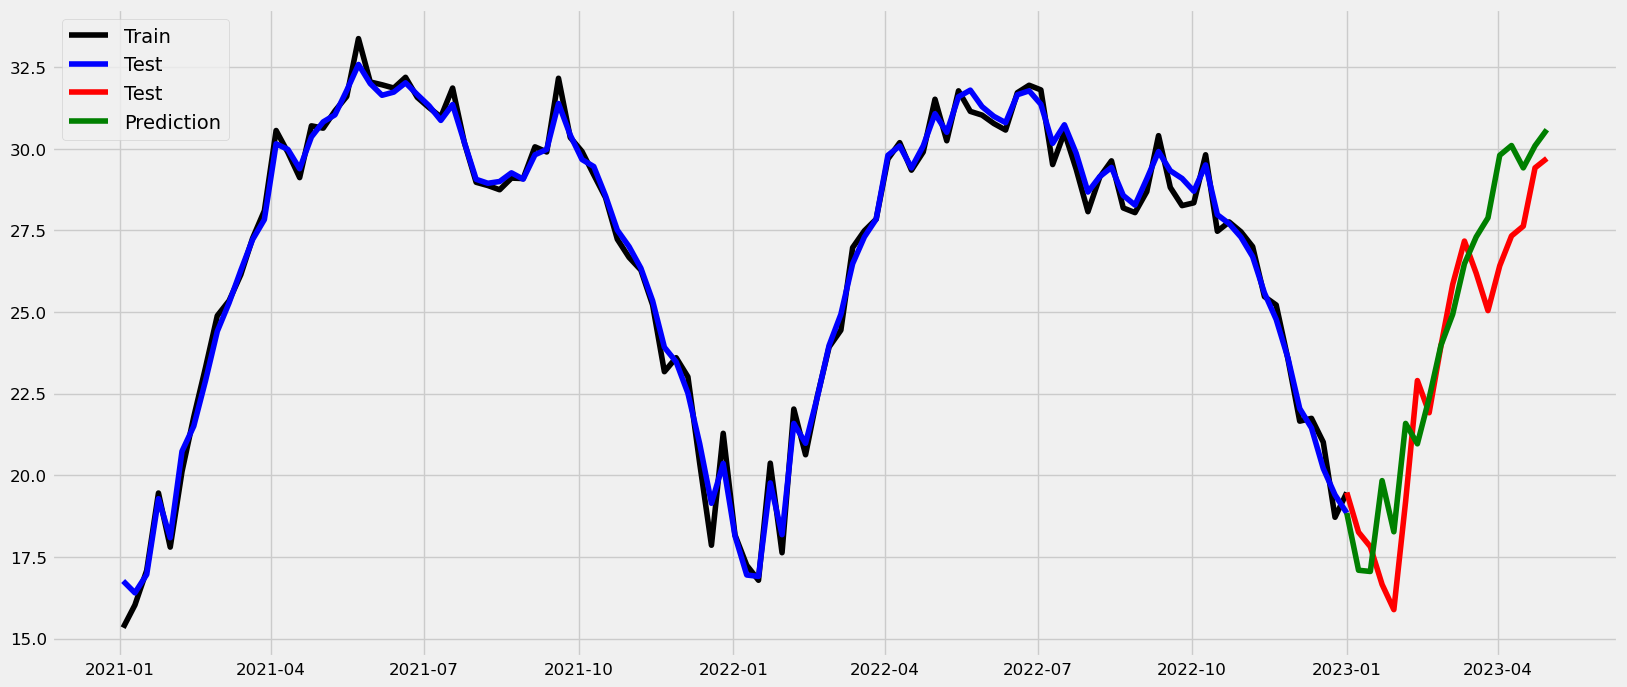

RMSE:  1.8549365415539882


In [157]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)

# predict for the test set period
preds_train = rfmodel.predict(X)

# predict for the test set period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index.values, train.values,color="black", label='Train')
plt.plot(train.index.values, preds_train,color="blue", label='Test')
plt.plot(test.index.values, test.values,color="red", label='Test')
plt.plot(test.index.values, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

### Q8

#### Comparison: 
##### ML Regression model had the lowest RMSE (1.85) score so it can be considered to be the best model out of all. Then SARIMA has a lower RMSE (2.62) and lastly ARIMA (2.71).

### Q9

In [171]:
futureX = pd.date_range(start='2024-11-01', end='2024-12-31', freq='W')

In [173]:
futureX

DatetimeIndex(['2024-11-03', '2024-11-10', '2024-11-17', '2024-11-24',
               '2024-12-01', '2024-12-08', '2024-12-15', '2024-12-22',
               '2024-12-29'],
              dtype='datetime64[ns]', freq='W-SUN')

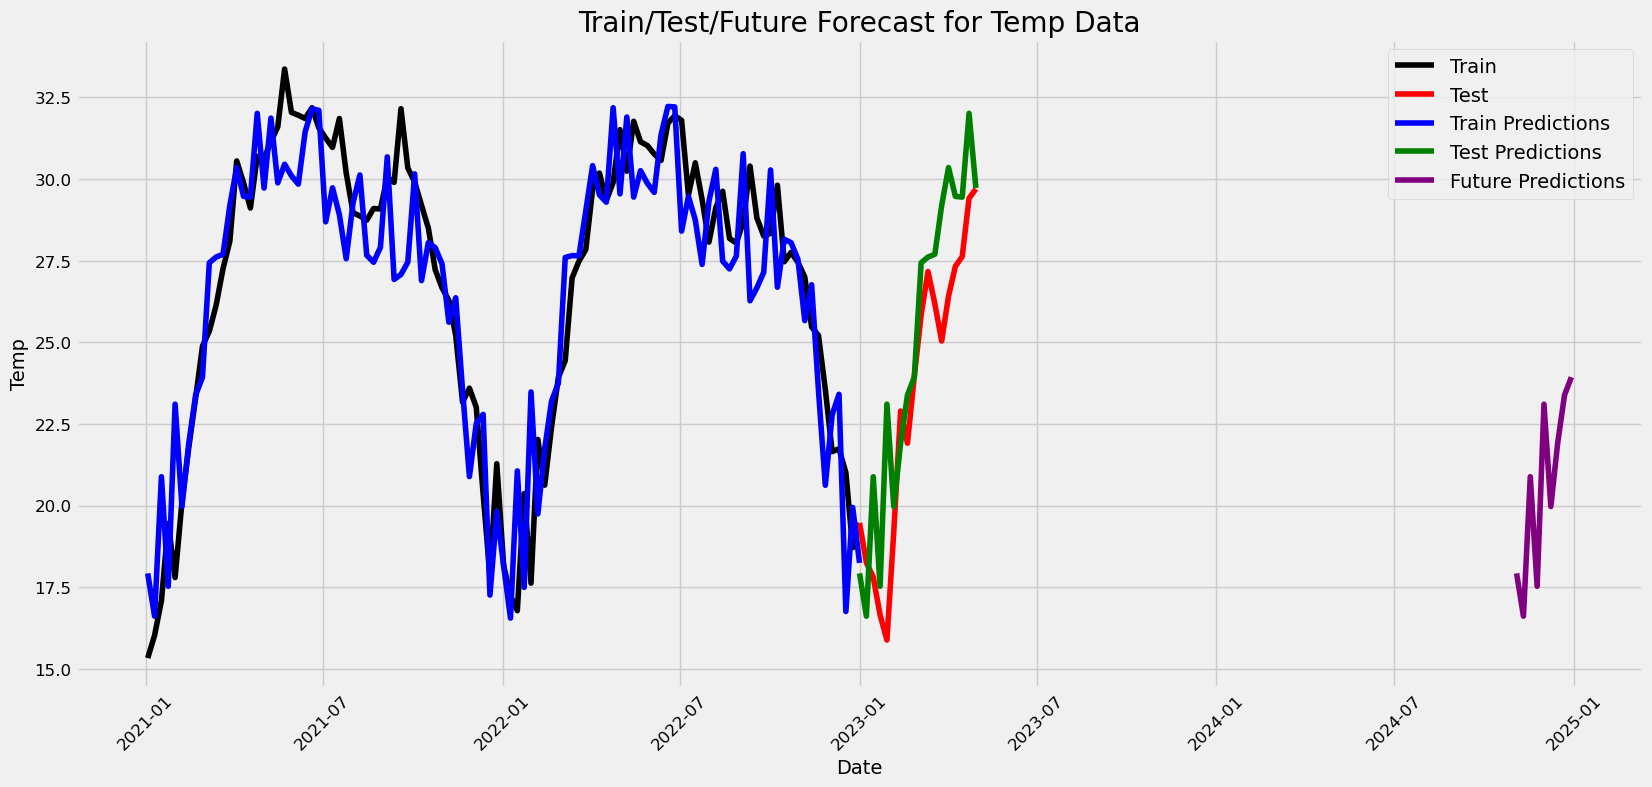

In [180]:
y_future_pred = SARIMAXmodel.get_forecast(steps=len(futureX))
y_future_pred_df = y_future_pred.conf_int(alpha=0.05)
y_future_pred_df["Predictions"] = y_future_pred.predicted_mean

y_future_pred_df.index = futureX

# Plotting
plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.plot(y_pred_out_train, color='blue', label='Train Predictions')
plt.plot(y_pred_out, color='green', label='Test Predictions')

# Plot future predictions
plt.plot(y_future_pred_df["Predictions"], color='purple', label='Future Predictions')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test/Future Forecast for Temp Data")
plt.legend()
plt.show()

### Q10

In [183]:
fdays = [date.day for date in futureX]
fmonths = [date.month for date in futureX]
fyears = [date.year for date in futureX]
fweeks = [date.isocalendar()[1] for date in futureX]

In [185]:
fpred = np.array([fdays, fmonths, fyears, fweeks]).T

In [187]:
future_preds = rfmodel.predict(fpred)

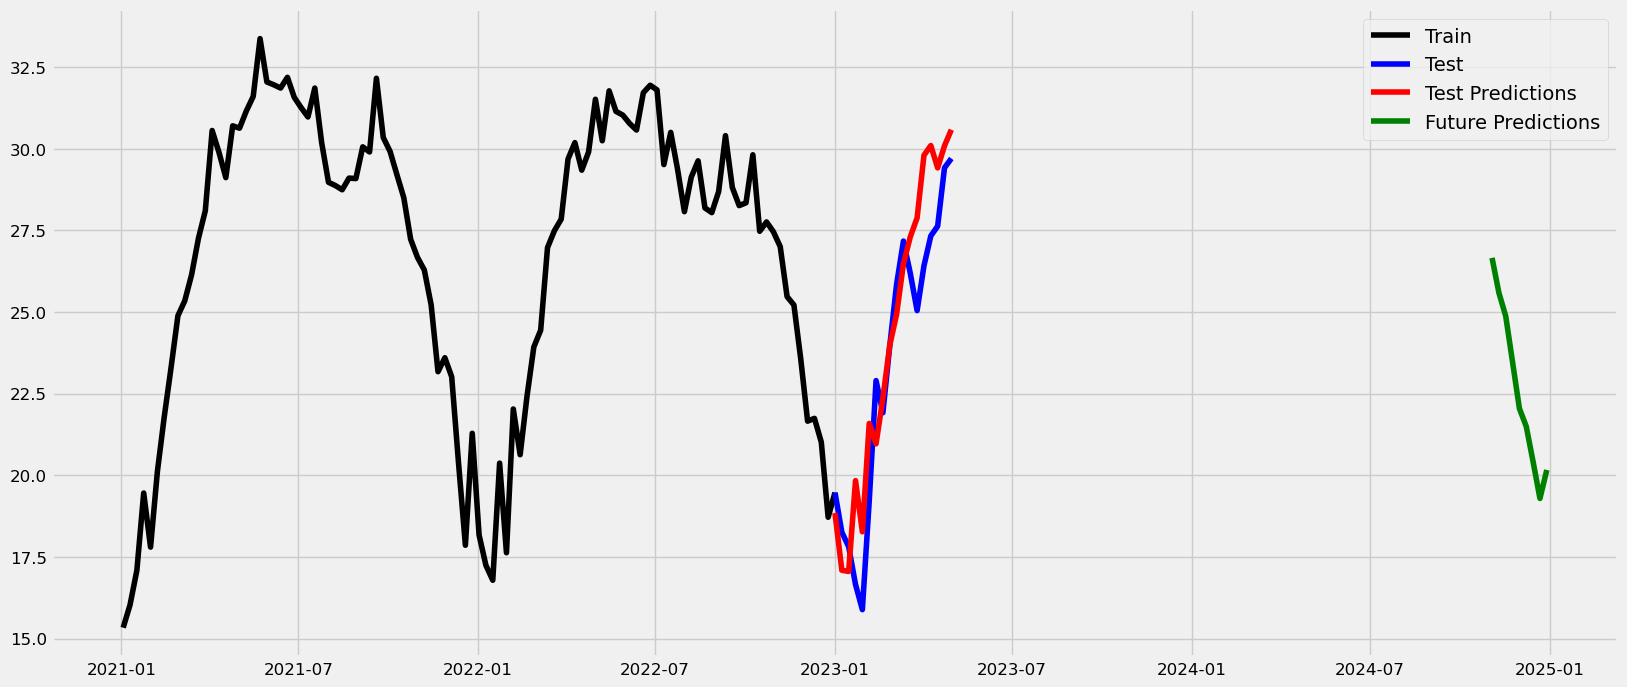

In [193]:
plt.plot(train.index.values, train.values, color="black", label='Train')
plt.plot(test.index.values, test.values, color="blue", label='Test')
plt.plot(test.index.values, preds, color="red", label='Test Predictions')
plt.plot(futureX, future_preds, color="green", label='Future Predictions')
plt.legend()
plt.show()

### Q11

#### Analysis 
#### SARIMA: The model effectively captures the temperature’s seasonal cycles, producing smooth curves that align well with both the training and test data. The future predictions extend the seasonal pattern, indicating the model’s expectation of continued cyclical behavior in temperature over time.
#### ML model: This model captures the data but does so in a more rigid, selective way, lacking the smooth transitions seen in SARIMA. While it performs reasonably on training and testing data, the future forecast appears less continuous
#### Difference:  SARIMA excels in capturing smooth, continuous seasonal patterns in the temperature data, while Random Forest produces more abrupt predictions.